In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [47]:
# Define the list of complete months
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

In [2]:
file_path = "data/laureates-1000.json"

with open(file_path, 'r') as file:
    data = json.load(file)

laureates = data['laureates']

In [3]:
# Correcting extraction of names and birth dates
birth_data = []

for laureate in laureates:
    birth_date = laureate.get('birth', {}).get('date')
    if birth_date:
        birth_data.append({'birth_date': birth_date})

# Convert to DataFrame
birth_df = pd.DataFrame(birth_data)

In [4]:
birth_df.head()

,birth_date
0,1943-00-00
1,1922-06-19
2,1947-10-01
3,1926-08-11
4,1948-00-00


In [34]:
# Extract birth months from the birth dates
birth_df['birth_month'] = pd.to_datetime(birth_df['birth_date'], format='%Y-%m-%d', errors='coerce').dt.month_name()
birth_df['birth_number'] = pd.to_datetime(birth_df['birth_date'], format='%Y-%m-%d', errors='coerce').dt.month

In [37]:
birth_df.head()

,birth_date,birth_month,birth_number
1,1922-06-19,June,6
2,1947-10-01,October,10
3,1926-08-11,August,8
5,1926-01-29,January,1
6,1961-02-21,February,2


In [38]:
birth_df.dropna(inplace=True)

In [40]:
birth_df.head()

,birth_date,birth_month,birth_number
1,1922-06-19,June,6
2,1947-10-01,October,10
3,1926-08-11,August,8
5,1926-01-29,January,1
6,1961-02-21,February,2


In [41]:
# Group by birth month and count the occurrences
birth_month_distribution = birth_df['birth_number'].value_counts()

In [44]:
birth_month_distribution.sort_index(inplace=True)

In [45]:
birth_month_distribution

birth_number
1     72
2     59
3     78
4     76
5     86
6     90
7     79
8     82
9     91
10    88
11    70
12    78
Name: count, dtype: int64

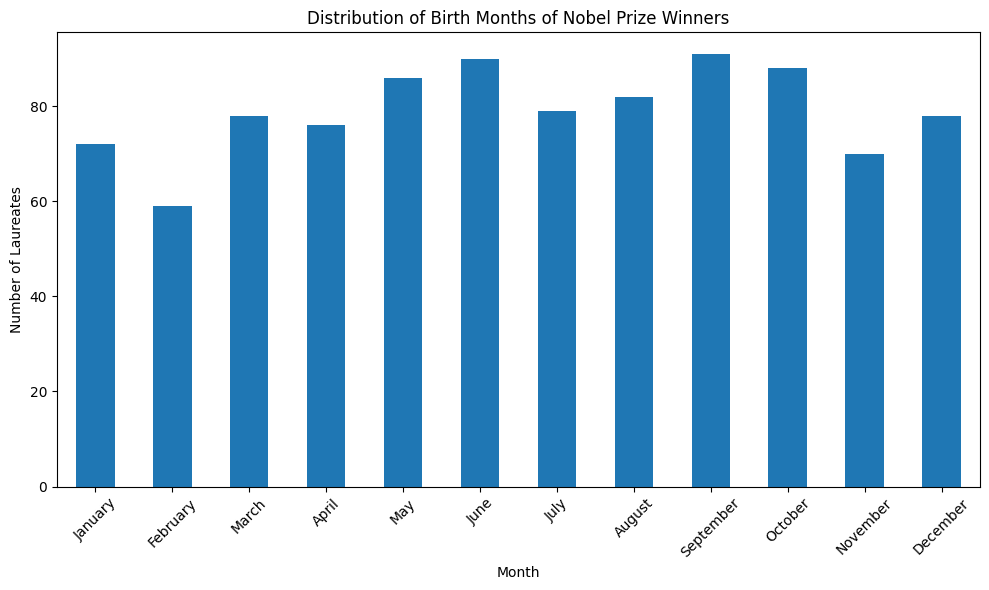

In [49]:
# Plot the birth month distribution
plt.figure(figsize=(10, 6))
birth_month_distribution.plot(kind='bar')
plt.title('Distribution of Birth Months of Nobel Prize Winners')
plt.xlabel('Month')
plt.ylabel('Number of Laureates')
plt.xticks(ticks=range(12), labels=months, rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


In [50]:
# Total Laureates births 
total_laureates = birth_month_distribution.sum()

In [51]:
total_laureates

949

In [52]:
birth_month_distribution_df = pd.DataFrame(birth_month_distribution)

In [53]:
birth_month_distribution_df.head()

,count
birth_number,
1,72
2,59
3,78
4,76
5,86


In [54]:
# Calculate the relative frequency of Nobel Laureates for each month
birth_month_distribution_df['percent'] = birth_month_distribution_df['count'] / total_laureates

In [55]:
birth_month_distribution_df

,count,percent
birth_number,,
1,72,0.075869
2,59,0.062171
3,78,0.082192
4,76,0.080084
5,86,0.090622
6,90,0.094837
7,79,0.083246
8,82,0.086407
9,91,0.095890


In [18]:
# Load in the UN live births data
un_file_path = "data/UNdata_Export_20240605_144312361.csv"
un_data = pd.read_csv(un_file_path)

In [56]:
un_data.head()

,Country or Area,Year,Area,Month,Record Type,Reliability,Source Year,Value,Value Footnotes
0,Åland Islands,2023,Total,Total,Data tabulated by year of occurrence,Provisional figure,2024.0,269.0,NaN
1,Åland Islands,2023,Total,January - March,Data tabulated by year of occurrence,Provisional figure,2023.0,64.0,NaN
2,Åland Islands,2023,Total,April - June,Data tabulated by year of occurrence,Provisional figure,2023.0,75.0,NaN
3,Åland Islands,2023,Total,July - September,Data tabulated by year of occurrence,Provisional figure,2024.0,62.0,NaN
4,Åland Islands,2023,Total,October - December,Data tabulated by year of occurrence,Provisional figure,2024.0,68.0,NaN


In [57]:
# Drop rows where the 'Reliability' value is 'Provisional figure'
un_data_reliability = un_data[un_data['Reliability'] != 'Provisional figure']

In [62]:
un_data_dropna = un_data_reliability.dropna()

In [63]:
un_data_dropna.tail()

,Country or Area,Year,Area,Month,Record Type,Reliability,Source Year,Value,Value Footnotes
56648,Venezuela (Bolivarian Republic of),1972,Total,August,Data tabulated by year of occurrence,"Final figure, complete",1976.0,36078.0,66
56649,Venezuela (Bolivarian Republic of),1972,Total,September,Data tabulated by year of occurrence,"Final figure, complete",1976.0,32459.0,66
56650,Venezuela (Bolivarian Republic of),1972,Total,October,Data tabulated by year of occurrence,"Final figure, complete",1976.0,35040.0,66
56651,Venezuela (Bolivarian Republic of),1972,Total,November,Data tabulated by year of occurrence,"Final figure, complete",1976.0,36297.0,66
56652,Venezuela (Bolivarian Republic of),1972,Total,December,Data tabulated by year of occurrence,"Final figure, complete",1976.0,35102.0,66


In [64]:
# Drop rows with incomplete months 
un_data_complete_months = un_data_dropna[un_data_dropna['Month'].isin(months)]

In [65]:
un_data_complete_months.tail()

,Country or Area,Year,Area,Month,Record Type,Reliability,Source Year,Value,Value Footnotes
56648,Venezuela (Bolivarian Republic of),1972,Total,August,Data tabulated by year of occurrence,"Final figure, complete",1976.0,36078.0,66
56649,Venezuela (Bolivarian Republic of),1972,Total,September,Data tabulated by year of occurrence,"Final figure, complete",1976.0,32459.0,66
56650,Venezuela (Bolivarian Republic of),1972,Total,October,Data tabulated by year of occurrence,"Final figure, complete",1976.0,35040.0,66
56651,Venezuela (Bolivarian Republic of),1972,Total,November,Data tabulated by year of occurrence,"Final figure, complete",1976.0,36297.0,66
56652,Venezuela (Bolivarian Republic of),1972,Total,December,Data tabulated by year of occurrence,"Final figure, complete",1976.0,35102.0,66


In [66]:
# Calculate the total number of births for each month
monthly_totals = un_data_complete_months.groupby('Month')['Value'].sum().reset_index()

In [68]:
# Add a new column 'month_number' to 'monthly_totals'
monthly_totals['month_number'] = monthly_totals['Month'].apply(lambda x: months.index(x) + 1)

In [70]:
monthly_totals.sort_values('month_number', inplace=True)

In [71]:
monthly_totals.head()

,Month,Value,month_number
4,January,2.099304e+07,1
3,February,1.903893e+07,2
7,March,2.052516e+07,3
0,April,1.997737e+07,4
8,May,2.063517e+07,5


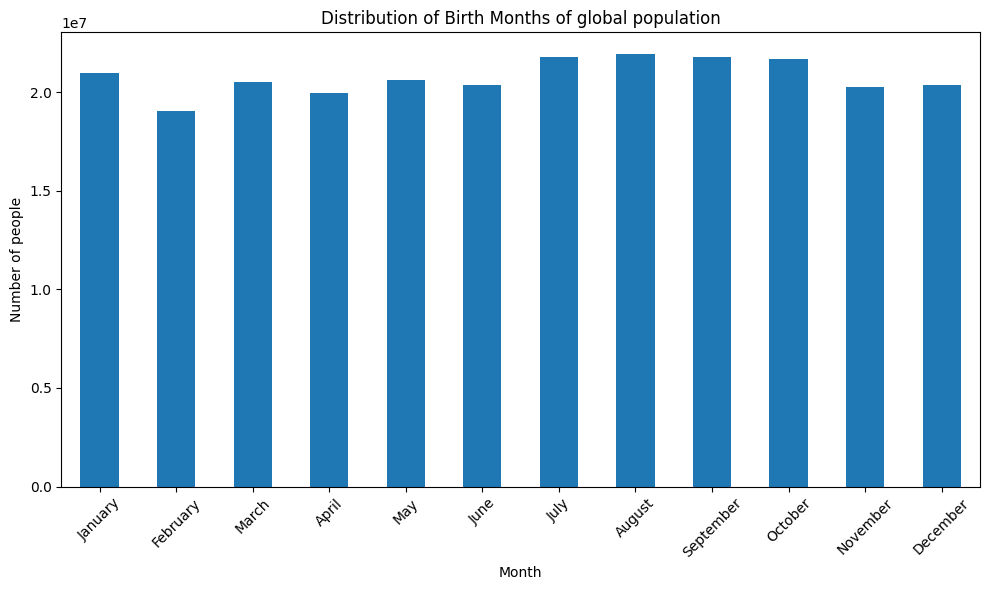

In [72]:
# Plot the birth month distribution
plt.figure(figsize=(10, 6))
monthly_totals["Value"].plot(kind='bar')
plt.title('Distribution of Birth Months of global population')
plt.xlabel('Month')
plt.ylabel('Number of people')
plt.xticks(ticks=range(12), labels=months, rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

In [73]:
# Total Laureates births 
total_world = monthly_totals['Value'].sum()

In [74]:
total_world

249244930.64929727

In [75]:
monthly_totals['percent'] = monthly_totals['Value'] / total_world

In [76]:
monthly_totals.head(12)

,Month,Value,month_number,percent
4,January,2.099304e+07,1,0.084227
3,February,1.903893e+07,2,0.076386
7,March,2.052516e+07,3,0.082349
0,April,1.997737e+07,4,0.080152
8,May,2.063517e+07,5,0.082791
6,June,2.037230e+07,6,0.081736
5,July,2.176467e+07,7,0.087322
1,August,2.193480e+07,8,0.088005
11,September,2.176035e+07,9,0.087305
10,October,2.166608e+07,10,0.086927


In [80]:
nobels_totals = birth_month_distribution_df.reset_index()

In [86]:
nobels_totals.columns = ['month_number', 'count', 'nobel_percent']

In [87]:
nobels_totals.head()

,month_number,count,nobel_percent
0,1,72,0.075869
1,2,59,0.062171
2,3,78,0.082192
3,4,76,0.080084
4,5,86,0.090622


In [88]:
combined_df = pd.merge(monthly_totals, nobels_totals, on='month_number')

In [89]:
combined_df.head()

,Month,Value,month_number,percent,count,nobel_percent
0,January,2.099304e+07,1,0.084227,72,0.075869
1,February,1.903893e+07,2,0.076386,59,0.062171
2,March,2.052516e+07,3,0.082349,78,0.082192
3,April,1.997737e+07,4,0.080152,76,0.080084
4,May,2.063517e+07,5,0.082791,86,0.090622


In [90]:
combined_df['normalised'] = combined_df['nobel_percent'] / combined_df['percent']

In [97]:
combined_df.head(12)

,Month,Value,month_number,percent,count,nobel_percent,normalised
0,January,2.099304e+07,1,0.084227,72,0.075869,0.900777
1,February,1.903893e+07,2,0.076386,59,0.062171,0.813897
2,March,2.052516e+07,3,0.082349,78,0.082192,0.998087
3,April,1.997737e+07,4,0.080152,76,0.080084,0.999161
4,May,2.063517e+07,5,0.082791,86,0.090622,1.094587
5,June,2.037230e+07,6,0.081736,90,0.094837,1.160280
6,July,2.176467e+07,7,0.087322,79,0.083246,0.953312
7,August,2.193480e+07,8,0.088005,82,0.086407,0.981839
8,September,2.176035e+07,9,0.087305,91,0.095890,1.098337
9,October,2.166608e+07,10,0.086927,88,0.092729,1.066749


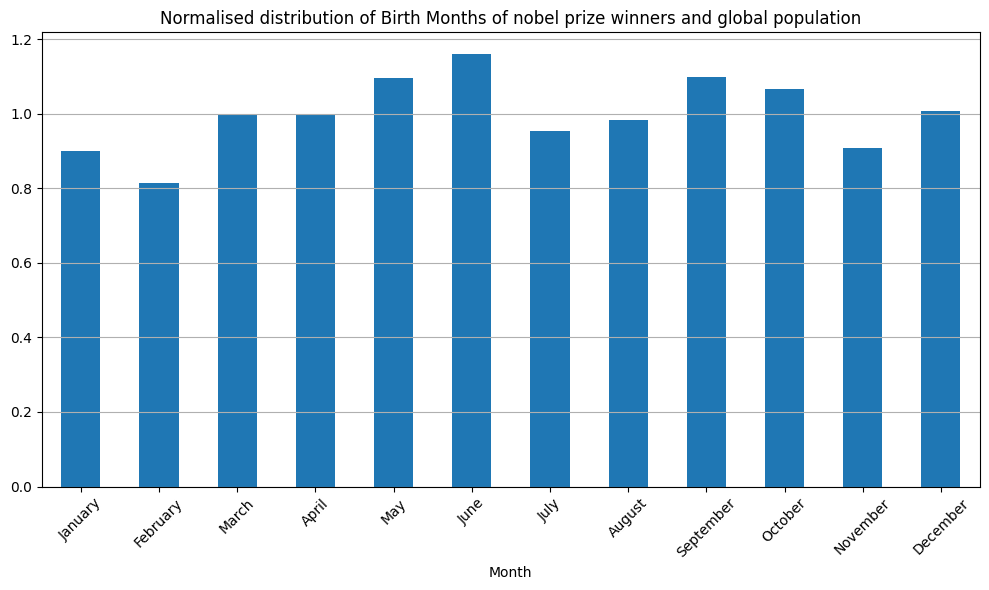

In [96]:
# Plot the normalised month distribution
plt.figure(figsize=(10, 6))
combined_df["normalised"].plot(kind='bar')
plt.title('Normalised distribution of Birth Months of nobel prize winners and global population')
plt.xlabel('Month')
# plt.ylabel('Number of people')
plt.xticks(ticks=range(12), labels=months, rotation=45)
plt.grid(axis='y')
plt.tight_layout()

# Display the plot
plt.show()